In [1]:
import numpy as np
import pandas as pd
from pandas.core.nanops import nanmean as pd_nanmean
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
ori = pickle.load(open("wave-ori.pkl", "rb"))
evl = pickle.load(open("wave-bmse.pkl", "rb"))

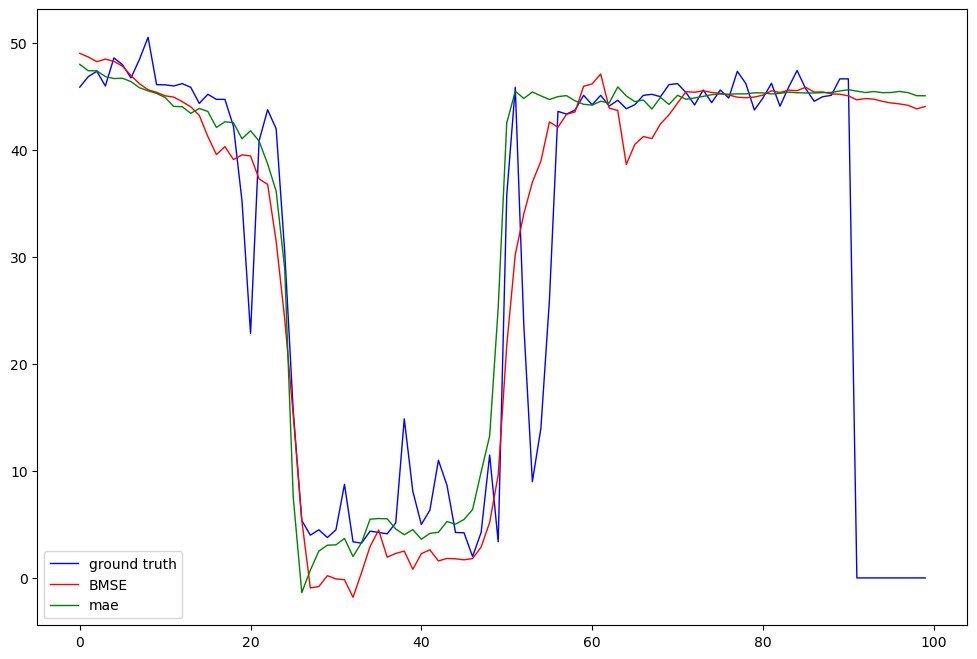

In [18]:
realy = ori["real12"]
ori_preds = ori["pred12"]
preds = evl["pred12"]
#realy = pd.DataFrame(realy)
#realy.replace(to_replace=0, method='ffill', inplace=True)
#realy = np.array(realy)


fig = plt.figure(figsize=(12, 8))
upper = 100
lower = 000
location = 29
plt.plot(range(upper - lower), realy[lower:upper, location], label='ground truth', linewidth=1, c = 'b')
plt.plot(range(upper - lower), preds[lower:upper, location], label='BMSE', linewidth=1, c='r')
plt.plot(range(upper - lower), ori_preds[lower:upper, location], label='mae', linewidth=1, c='g')
plt.legend()

In [4]:
np.quantile(np.abs(realy[realy > 0] - preds[realy > 0]), .99)

31.91228137969973

In [5]:
np.quantile(np.abs(realy[realy > 0] - ori_preds[realy > 0]), .99)

35.85986782073984

In [16]:
np.where(preds < 0)

(array([  27,   28,   30,   31,   32,  147,  151,  315,  604,  607,  608,
         618,  619,  892,  894,  895,  896,  897,  907,  912, 1190, 1191,
        2043, 2044, 2045, 2047, 2048, 2049, 2050, 2052, 2054, 2332, 2333,
        2334, 2335, 2336, 2619, 2620, 2621, 2625, 2626, 2908, 2912, 2913,
        2914, 2915, 2921, 4348, 4349, 4352, 4353, 4354, 4356, 4357, 4636,
        6379, 6664]),
 array([29, 29, 29, 29, 29, 38, 38, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 77, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29]))

(array([  2560.,  16317.,  31240.,  38952.,  41821.,  33642.,  44244.,
         97815., 330540., 609091.]),
 array([ 0.75      ,  7.67500019, 14.60000038, 21.52499962, 28.45000076,
        35.375     , 42.29999924, 49.22499847, 56.15000153, 63.07500076,
        70.        ]),
 <BarContainer object of 10 artists>)

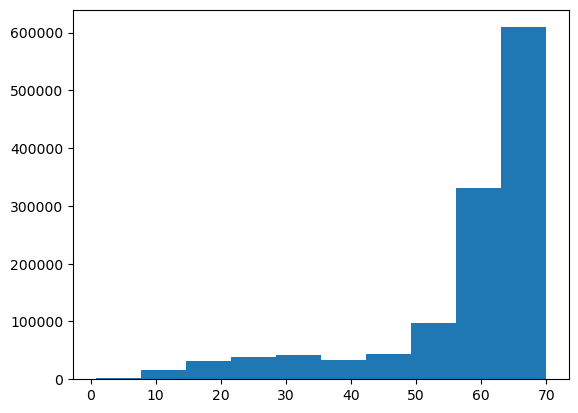

In [20]:
plt.hist(realy[realy > 0])